In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("fitting_results.csv")

df = df[df["sample_size"] > 100]

weighted_loss_exp = (df["loss_exp"] * df["sample_size"]).sum() / df["sample_size"].sum()
weighted_loss_pow = (df["loss_pow"] * df["sample_size"]).sum() / df["sample_size"].sum()
weighted_loss_exp_with_intercept = (
    df["loss_exp_with_intercept"] * df["sample_size"]
).sum() / df["sample_size"].sum()

print(f"weighted_loss_exp: {weighted_loss_exp}")
print(f"weighted_loss_pow: {weighted_loss_pow}")
print(f"weighted_loss_exp_with_intercept: {weighted_loss_exp_with_intercept}")

weighted_loss_exp: 0.28195437554580777
weighted_loss_pow: 0.2639686350341585
weighted_loss_exp_with_intercept: 0.26385076666253365


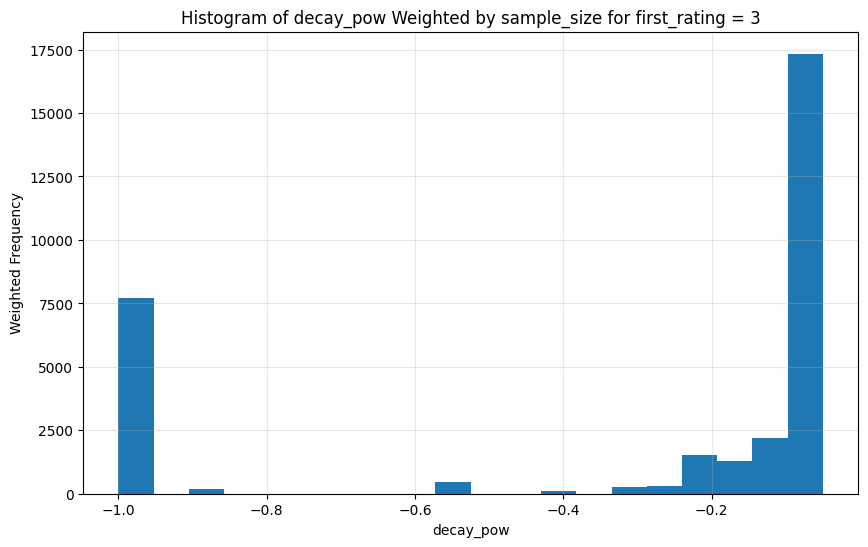

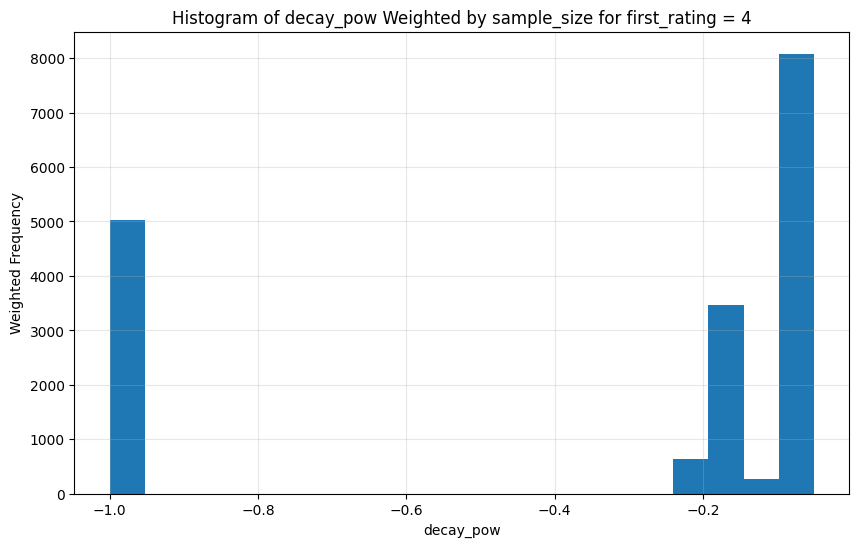

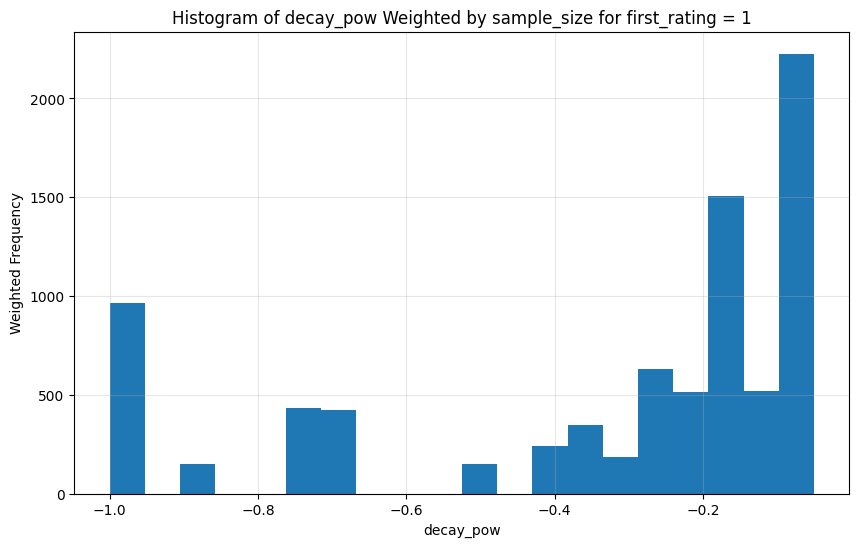

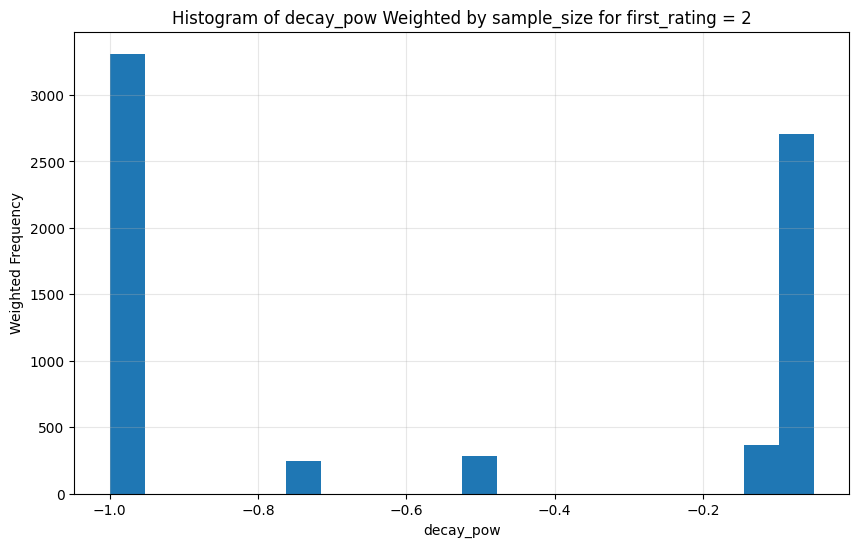

In [2]:
for rating in df["first_rating"].unique():
    df_rating = df[df["first_rating"] == rating]
    plt.figure(figsize=(10, 6))
    plt.hist(df_rating["decay_pow"], bins=20, weights=df_rating["sample_size"])
    plt.xlabel("decay_pow")
    plt.ylabel("Weighted Frequency")
    plt.title(
        f"Histogram of decay_pow Weighted by sample_size for first_rating = {rating}"
    )
    plt.grid(True, alpha=0.3)
    plt.show()

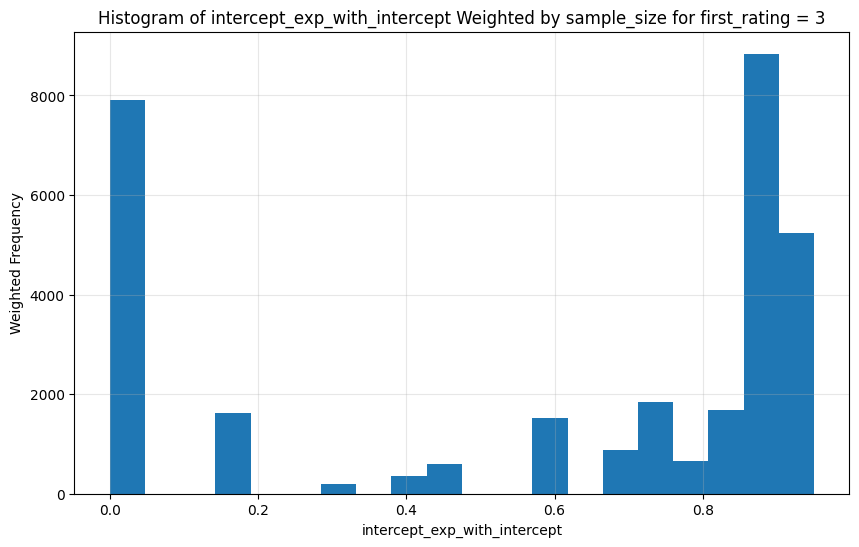

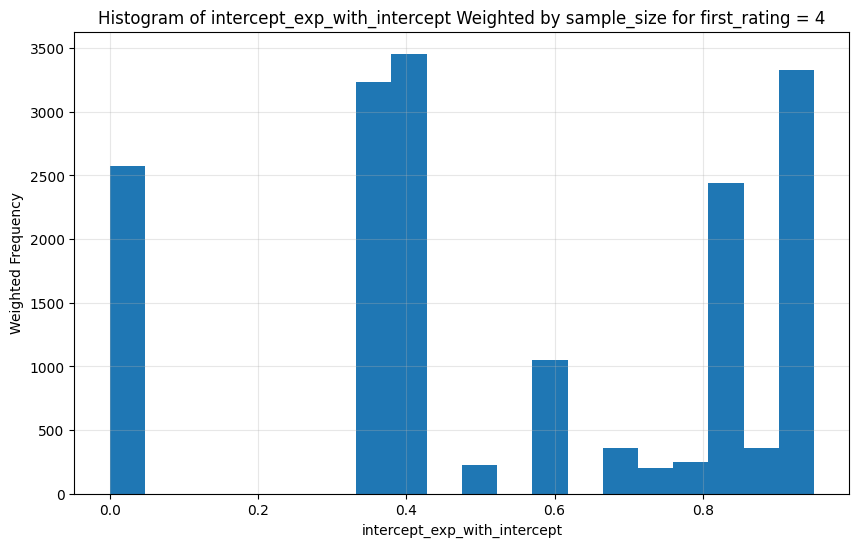

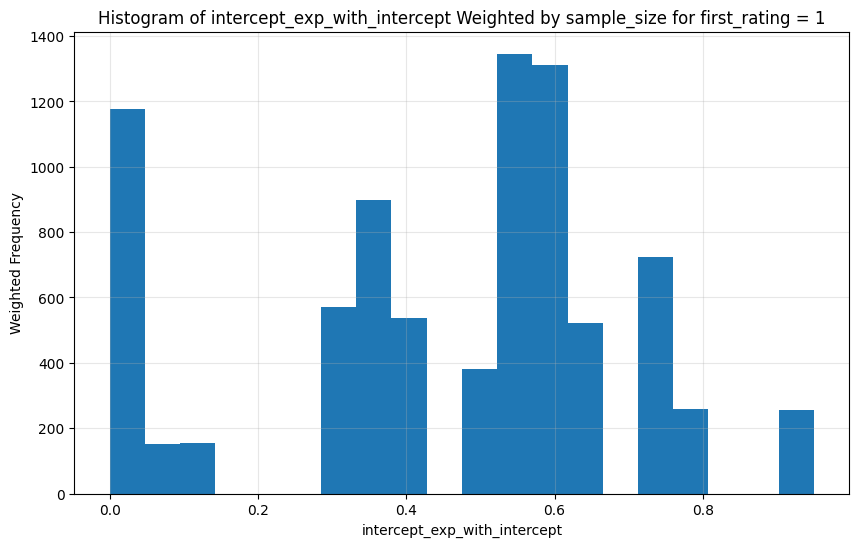

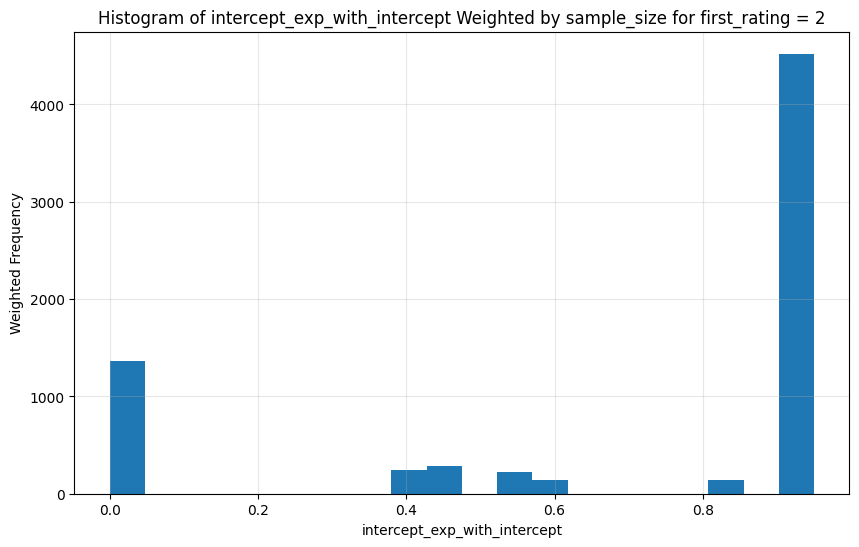

In [3]:
for rating in df["first_rating"].unique():
    df_rating = df[df["first_rating"] == rating]
    plt.figure(figsize=(10, 6))
    plt.hist(
        df_rating["intercept_exp_with_intercept"],
        bins=20,
        weights=df_rating["sample_size"],
    )
    plt.xlabel("intercept_exp_with_intercept")
    plt.ylabel("Weighted Frequency")
    plt.title(
        f"Histogram of intercept_exp_with_intercept Weighted by sample_size for first_rating = {rating}"
    )
    plt.grid(True, alpha=0.3)
    plt.show()

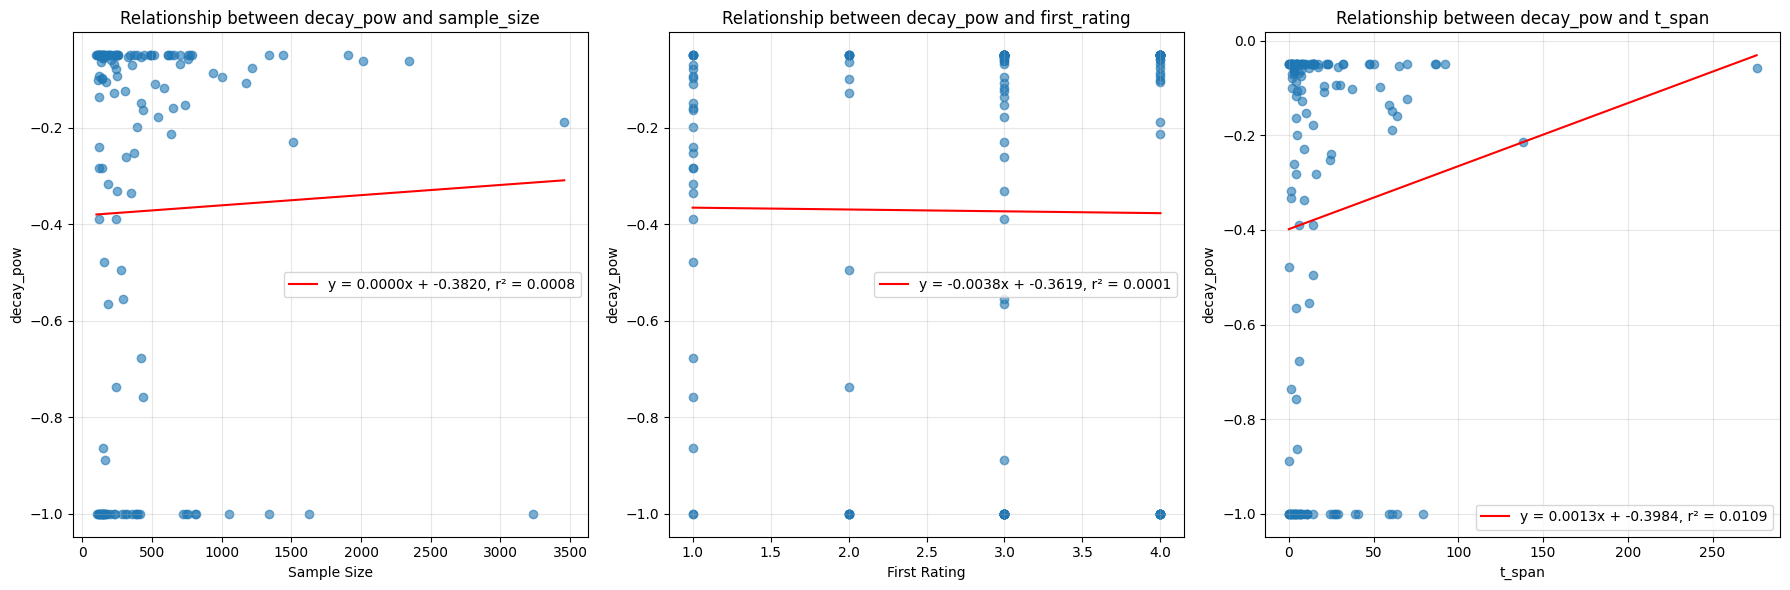

/opt/homebrew/Caskroom/miniforge/base/envs/fsrs4anki/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniforge/base/envs/fsrs4anki/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniforge/base/envs/fsrs4anki/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniforge/base/envs/fsrs4anki/lib/python3.9/site-packages/seaborn

<Figure size 1000x800 with 0 Axes>

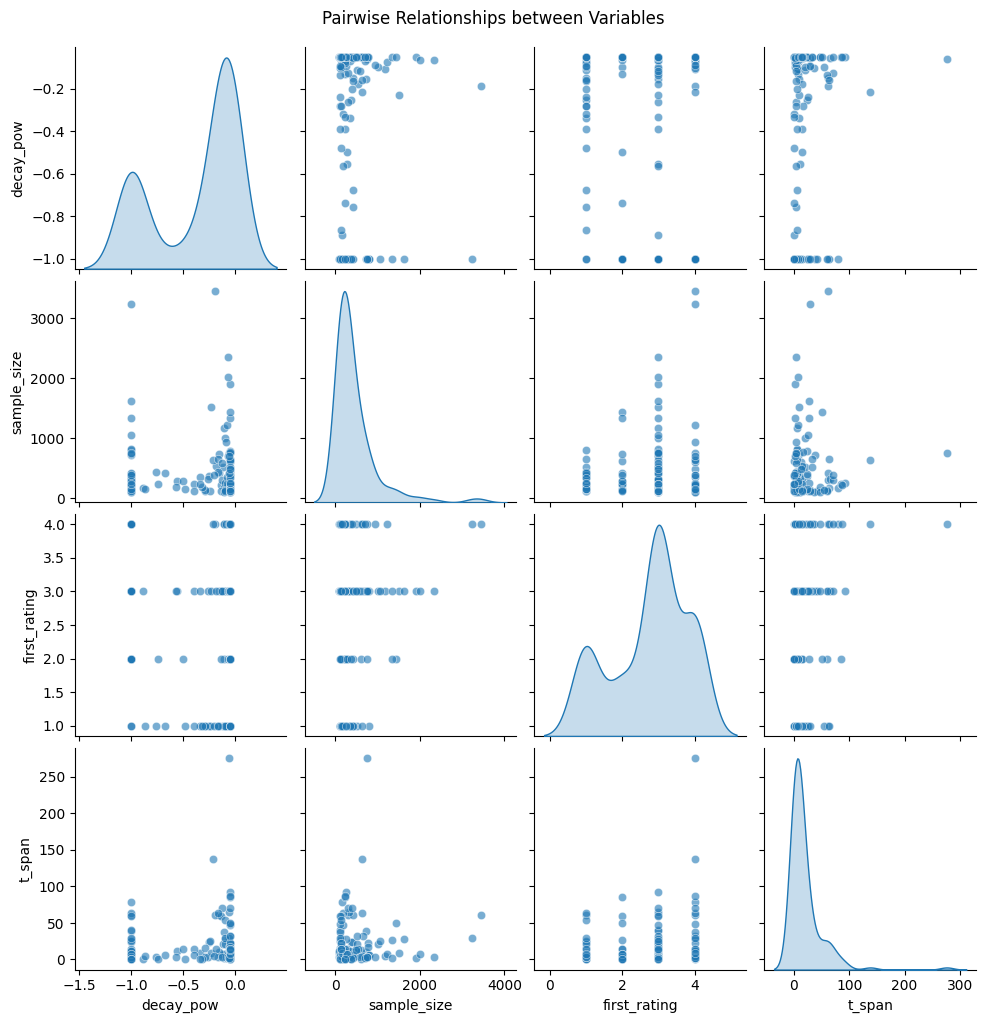

In [4]:
import numpy as np
from scipy import stats
import seaborn as sns

# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 1. Relationship between decay_pow and sample_size
axes[0].scatter(df["sample_size"], df["decay_pow"], alpha=0.6)
# Add regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(
    df["sample_size"], df["decay_pow"]
)
x_line = np.linspace(df["sample_size"].min(), df["sample_size"].max(), 100)
y_line = slope * x_line + intercept
axes[0].plot(
    x_line,
    y_line,
    "r-",
    label=f"y = {slope:.4f}x + {intercept:.4f}, r² = {r_value**2:.4f}",
)
axes[0].set_xlabel("Sample Size")
axes[0].set_ylabel("decay_pow")
axes[0].set_title("Relationship between decay_pow and sample_size")
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 2. Relationship between decay_pow and first_rating
axes[1].scatter(df["first_rating"], df["decay_pow"], alpha=0.6)
# Add regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(
    df["first_rating"], df["decay_pow"]
)
x_line = np.linspace(df["first_rating"].min(), df["first_rating"].max(), 100)
y_line = slope * x_line + intercept
axes[1].plot(
    x_line,
    y_line,
    "r-",
    label=f"y = {slope:.4f}x + {intercept:.4f}, r² = {r_value**2:.4f}",
)
axes[1].set_xlabel("First Rating")
axes[1].set_ylabel("decay_pow")
axes[1].set_title("Relationship between decay_pow and first_rating")
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# 3. Relationship between decay_pow and t_span
axes[2].scatter(df["t_span"], df["decay_pow"], alpha=0.6)
# Add regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(
    df["t_span"], df["decay_pow"]
)
x_line = np.linspace(df["t_span"].min(), df["t_span"].max(), 100)
y_line = slope * x_line + intercept
axes[2].plot(
    x_line,
    y_line,
    "r-",
    label=f"y = {slope:.4f}x + {intercept:.4f}, r² = {r_value**2:.4f}",
)
axes[2].set_xlabel("t_span")
axes[2].set_ylabel("decay_pow")
axes[2].set_title("Relationship between decay_pow and t_span")
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
sns.pairplot(
    df[["decay_pow", "sample_size", "first_rating", "t_span"]],
    kind="scatter",
    diag_kind="kde",
    plot_kws={"alpha": 0.6},
)
plt.suptitle("Pairwise Relationships between Variables", y=1.02)
plt.show()